# Calculating the Most Cost-Effective Alcohols at Mercadona

In this "scientific endeavor," we aim to determine the best value for your money when planning a night out with selections from Mercadona.

## Data Collection

Harnessing the power of `mercapy`, data was extracted from Mercadona's API. To ensure working with more or less clean data, we opted for the "mad1" warehouse located in Madrid instead of sampling from all the warehouses across Spain. This particular warehouse offers a diverse selection of 236 alcoholic beverages, including beer, spirits, and wine. Cheers to data-driven decisions!


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("data/drinks_mad1.csv", encoding="latin")
df.head(5)

,id,ean,name,legal_name,unit_price,is_discounted,previous_price,origin,supplier,weight,category,age_check,alcohol_by_volume,is_new,is_pack,pack_size
0,66211,8480000662118,Vino tinto Casón Histórico,Vino tinto sin DOP/IGP,1.05,False,NaN,Producto de España,"García Carrión 1890, S.L.",1.0,Bodega,True,13.0,False,False,NaN
1,66107,8410261271101,Vino tinto Don Simón,Vino tinto,1.60,False,NaN,Producto de España,JGC S.A,1.0,Bodega,True,12.0,False,False,NaN
2,66710,8436612580005,Vino tinto tempranillo Elegido,Vino Tinto,2.00,False,NaN,España,"Terra Cellars, S.L.U.",1.0,Bodega,True,13.0,False,False,NaN
3,37808,8412423110068,Vino tinto Dominio de Borgia,Vino de mesa tinto,2.70,False,NaN,España,"Bodegas Borsao, S.A.",2.0,Bodega,True,13.5,False,False,NaN
4,66960,8410275002135,Vino tinto Masía de Altigón,Vino tinto,5.55,False,NaN,Sin IGP,"Bodegas EL Villar, S.C.V.",5.0,Bodega,True,13.0,False,False,NaN


## Data Cleaning

Before diving into the analysis, we need to clean up the data:

1. Substitute 0% alcohol drinks (which appear as NaN) with 0.
2. Exclude discounted products to ensure consistent pricing analysis.


In [5]:
df['alcohol_by_volume'] = df["alcohol_by_volume"].fillna(0)
df = df[~df["is_discounted"]]

## Calculations

To ensure an optimal night out, we need to calculate some key metrics for each item. Here's how we do it:

1. **Calculating Alcohol per Liter**:
   - This calculation determines the amount of pure alcohol in liters for each item.
   - It takes the alcohol by volume (ABV) percentage, divides it by 100 to convert it into a fraction, and then multiplies this fraction by the weight of the item in liters.
   - **Formula**: \((\text{ABV} / 100) \times \text{weight}\)

2. **Calculating Alcohol per Euro**:
   - This calculation determines the amount of pure alcohol you get per euro spent.
   - It divides the previously calculated alcohol per liter by the unit price of the item.
   - **Formula**: \(\text{alcohol per liter} / \text{unit price}\)


In [6]:
df["alcohol_per_liter"] = (df["alcohol_by_volume"]/100) * df["weight"]
df["alcohol_per_euro"] = df["alcohol_per_liter"] / df["unit_price"]

df = df.sort_values(by="alcohol_per_euro", ascending=False).nlargest(
    10, "alcohol_per_euro"
)

df.drop(columns=["legal_name", "previous_price", "supplier", "age_check", "origin", "is_discounted", "is_new", "is_pack", "pack_size"])

,id,ean,name,unit_price,weight,category,alcohol_by_volume,alcohol_per_liter,alcohol_per_euro
0,66211,8480000662118,Vino tinto Casón Histórico,1.05,1.00,Bodega,13.0,0.1300,0.123810
45,66127,8480000661272,Vino blanco Casón Histórico,0.90,1.00,Bodega,11.0,0.1100,0.122222
4,66960,8410275002135,Vino tinto Masía de Altigón,5.55,5.00,Bodega,13.0,0.6500,0.117117
5,37804,8413557700071,Vino tinto Hacienda Zargón,5.55,5.00,Bodega,13.0,0.6500,0.117117
39,37802,8412423110075,Vino rosado Dominio de Borgia,2.40,2.00,Bodega,13.5,0.2700,0.112500
3,37808,8412423110068,Vino tinto Dominio de Borgia,2.70,2.00,Bodega,13.5,0.2700,0.100000
1,66107,8410261271101,Vino tinto Don Simón,1.60,1.00,Bodega,12.0,0.1200,0.075000
12,37139,8411767020811,Vino tinto D.O La Mancha Fidencio,1.35,0.75,Bodega,13.0,0.0975,0.072222
48,66105,8410261273105,Vino blanco Don Simón,1.60,1.00,Bodega,11.0,0.1100,0.068750
75,66922,8480000669223,Sangría Casón Histórico,1.60,1.50,Bodega,7.0,0.1050,0.065625


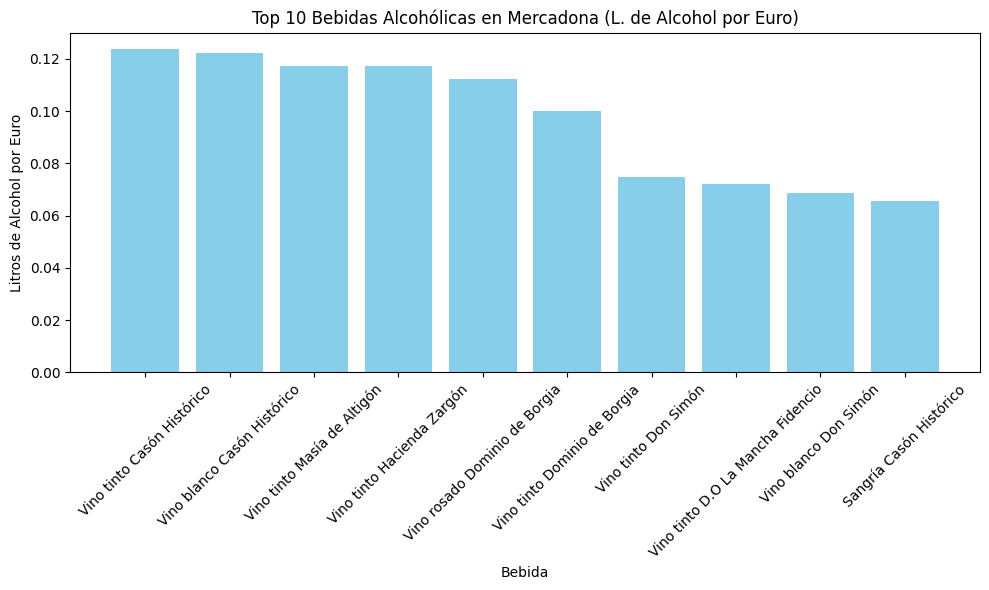

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(df["name"], df["alcohol_per_euro"], color="skyblue")
plt.title("Top 10 Bebidas Alcohólicas en Mercadona (L. de Alcohol por Euro)")
plt.xlabel("Bebida")
plt.ylabel("Litros de Alcohol por Euro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()